In [ ]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.DataFrame()
df1 = pd.read_csv('yellow_tripdata_2015-01.csv')

# Reinitialize the DataFrame and load the data
df2 = pd.DataFrame()
df2 = pd.read_csv('yellow_tripdata_2016-01.csv')

# Reinitialize the DataFrame and load the data
df3 = pd.DataFrame()
df3 = pd.read_csv('yellow_tripdata_2016-02.csv')


In [ ]:
df=pd.concat([df1,df2,df3],axis=0)

In [ ]:
df.shape

(8685530, 20)

In [ ]:
len(df.columns)

20

In [ ]:
df.shape

(8685530, 20)

In [ ]:
df.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
pickup_longitude               1
pickup_latitude                2
RateCodeID               5791111
store_and_fwd_flag             2
dropoff_longitude              2
dropoff_latitude               2
payment_type                   3
fare_amount                    3
extra                          3
mta_tax                        3
tip_amount                     3
tolls_amount                   3
improvement_surcharge          3
total_amount                   3
RatecodeID               2894421
dtype: int64

In [ ]:
df=df.drop(['RateCodeID','RatecodeID'],axis=1)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [ ]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [ ]:
df['pickup_latitude'] = pd.to_numeric(df['pickup_latitude'])
df['pickup_longitude'] = pd.to_numeric(df['pickup_longitude'])
df['dropoff_latitude'] = pd.to_numeric(df['dropoff_latitude'])
df['dropoff_longitude'] = pd.to_numeric(df['dropoff_longitude'])

In [ ]:
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Calculate the Haversine distance between two points on the earth specified by latitude and longitude.

    Parameters:
    lat1, lng1: Latitude and longitude of the first point in decimal degrees.
    lat2, lng2: Latitude and longitude of the second point in decimal degrees.

    Returns:
    The distance between the two points in kilometers.
    """
    AVG_EARTH_RADIUS = 6371  # Average radius of the earth in km
    # Convert latitude and longitude from degrees to radians
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))

    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlng = lng2 - lng1

    # Haversine formula to calculate the distance
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    h = AVG_EARTH_RADIUS * c

    return h

def add_distance_feature(df):
    """
    Adds a new column 'distance' to the dataframe which is the Haversine distance between pickup and dropoff locations.

    Parameters:
    df: The dataframe to which the distance feature should be added. Assumes the dataframe has 'pickup_latitude',
    'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' columns.
    """
    # Calculate distance and assign to 'distance' column
    df['haversine_distance'] = ft_haversine_distance(df['pickup_latitude'],
                                           df['pickup_longitude'],
                                           df['dropoff_latitude'],
                                           df['dropoff_longitude'])


add_distance_feature(df)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,haversine_distance
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05,1.610893
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80,3.924552
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2.592739
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.794628
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.0,0.3,16.30,3.544626


In [ ]:
df['dropoff_latitude'] = pd.to_numeric(df['dropoff_latitude'])
df['dropoff_longitude'] = pd.to_numeric(df['dropoff_longitude'])

In [ ]:
def ft_degree(lat1, lng1, lat2, lng2):
    """
    Calculate the direction of travel from one point to another using latitude and longitude.

    Parameters:
    lat1, lng1: Latitude and longitude of the starting point.
    lat2, lng2: Latitude and longitude of the ending point.

    Returns:
    The travel direction in degrees from the starting point to the ending point.
    """
    AVG_EARTH_RADIUS = 6371  # km, average radius of Earth
    lng_delta_rad = np.radians(lng2 - lng1)  # Difference in longitude, converted to radians
    # Convert all latitudes and longitudes to radians
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))

    # Calculate the direction
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))  # Convert the result to degrees

def add_direction_feature(df):
    """
    Adds a 'direction' feature to the dataframe, indicating the travel direction from pickup to dropoff.

    Parameters:
    df: The dataframe to which the direction feature should be added. Assumes the dataframe has
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' columns.
    """
    # Calculate direction and assign to 'direction' column
    df['direction'] = ft_degree(df['pickup_latitude'].values,
                                df['pickup_longitude'].values,
                                df['dropoff_latitude'].values,
                                df['dropoff_longitude'].values)

# Apply the function to add a 'direction' feature to both train and test datasets
add_direction_feature(df)

In [ ]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,haversine_distance,direction
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.00,0.3,17.05,1.610893,87.986790
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.00,0.3,17.80,3.924552,8.929682
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.00,0.3,10.80,2.592739,21.954795
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.794628,30.325198
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.00,0.3,16.30,3.544626,-128.331214
5,1,2015-01-10 20:33:39,2015-01-10 20:53:52,1,9.00,-73.874374,40.774048,N,-73.986977,40.758194,1.0,27.0,0.5,0.5,6.70,5.33,0.3,40.33,9.645482,-100.494177
6,1,2015-01-10 20:33:39,2015-01-10 20:58:31,1,2.20,-73.983276,40.726009,N,-73.992470,40.749634,2.0,14.0,0.5,0.5,0.00,0.00,0.3,15.30,2.738731,-16.425663
7,1,2015-01-10 20:33:39,2015-01-10 20:42:20,3,0.80,-74.002663,40.734142,N,-73.995010,40.726326,1.0,7.0,0.5,0.5,1.66,0.00,0.3,9.96,1.082202,143.426254
8,1,2015-01-10 20:33:39,2015-01-10 21:11:35,3,18.20,-73.783043,40.644356,N,-73.987595,40.759357,2.0,52.0,0.0,0.5,0.00,5.33,0.3,58.13,21.467560,-53.372875
9,1,2015-01-10 20:33:40,2015-01-10 20:40:44,2,0.90,-73.985588,40.767948,N,-73.985916,40.759365,1.0,6.5,0.5,0.5,1.55,0.00,0.3,9.35,0.954794,-178.341651


In [ ]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
haversine_distance       float64
direction                float64
dtype: object

In [ ]:
df=df.dropna(subset=['passenger_count','trip_distance','pickup_longitude','pickup_latitude','store_and_fwd_flag','dropoff_longitude','dropoff_latitude','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','tolls_amount','improvement_surcharge','total_amount','haversine_distance','direction'])

In [ ]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
haversine_distance       0
direction                0
dtype: int64

In [ ]:
df=df.drop('VendorID',axis=1)

In [ ]:
# We tried building models form this dataset and this point and we got a an accuracy of 0.17% .we now intend to improve it by exploring the dataset further.

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,haversine_distance,direction
0,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05,1.610893,87.986790
1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80,3.924552,8.929682
2,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2.592739,21.954795
3,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.794628,30.325198
4,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.0,0.3,16.30,3.544626,-128.331214


In [ ]:
df['tpep_pickup_datetime']=dd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,haversine_distance,direction
0,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05,1.610893,87.986790
1,2016-01-01 00:00:00,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80,3.924552,8.929682
2,2016-02-25 17:24:20,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2.592739,21.954795
3,2016-02-25 23:10:50,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.794628,30.325198
4,2015-01-10 20:33:38,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.0,0.3,16.30,3.544626,-128.331214


In [ ]:

# Extract month, day, and hour
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [ ]:
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [ ]:
features=['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','haversine_distance','month','day','hour','fare_amount']

In [ ]:
df_original=df[features]

In [ ]:
df_original.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,haversine_distance,month,day,hour,fare_amount
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,1.610893,1,15,19,12.0
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,3.924552,1,1,0,14.5
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,2.592739,2,25,17,9.5
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,0.794628,2,25,23,3.5
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,3.544626,1,10,20,15.0


In [ ]:

def remove_outliers_all_columns(df,col):
    numeric_columns = df[col]
    if col in numeric_columns:
        Q1 = df[col].quantile(0.25).compute()
        Q3 = df[col].quantile(0.75).compute()
        IQR = Q3 - Q1

        # Define the acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Example usage:
df_pandas= remove_outliers_all_columns(df_original, 'fare_amount')

In [ ]:
df_taxi=df_pandas.sample(80000)

 ## Visualizing the columns

In [ ]:
skew_passenger=df_taxi['passenger_count'].skew()
print(skew_passenger)

2.2346337054274845


<Axes: ylabel='Density'>

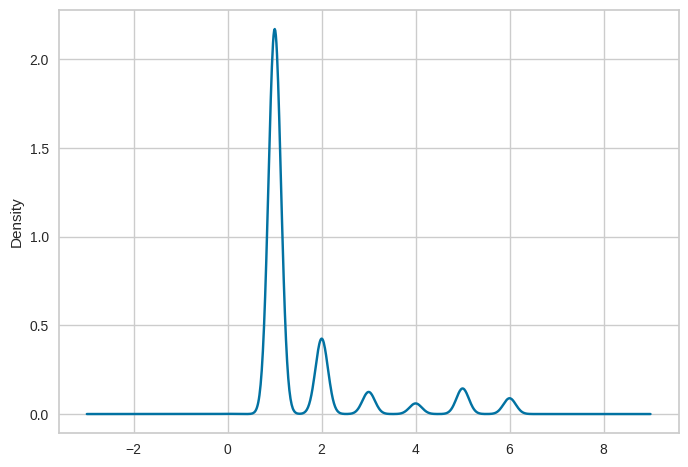

In [ ]:
df_taxi['passenger_count'].plot(kind='kde')

In [ ]:
skew_fare=df_taxi['fare_amount'].skew()
print(skew_fare)

4.599394993810832


In [ ]:
skew_trip_distance=df_taxi['trip_distance'].skew()
print(skew_trip_distance)

4.072171721417425


In [ ]:
df_taxi['fare_amount_real'] = np.log1p(df_taxi['fare_amount'])


In [ ]:
print(df_taxi['fare_amount_real'].skew())


0.8413181207377096


In [ ]:
df_taxi['passenger_count_real'] = np.log1p(df_taxi['passenger_count'])

In [ ]:
print(df_taxi['passenger_count_real'].skew())

1.7587736035664898


In [ ]:
df_taxi = df_taxi.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

In [ ]:
df_taxi = df_taxi.drop(columns=['passenger_count', 'fare_amount'])

In [ ]:
df_taxi.head()

,trip_distance,haversine_distance,month,day,hour,fare_amount_real,passenger_count_real
2604045,1.75,2.727861,1,28,12,2.140066,0.693147
1261799,1.80,2.683295,1,11,9,2.251292,0.693147
571940,0.74,0.786191,1,31,9,1.704748,0.693147
323249,4.75,5.358867,1,10,11,2.995732,0.693147
313634,20.93,23.108070,2,3,18,3.970292,0.693147


In [ ]:

def remove_outliers_all_columns(df,col):
    numeric_columns = df[col]
    if col in numeric_columns:
        Q1 = df[col].quantile(0.25).compute()
        Q3 = df[col].quantile(0.75).compute()
        IQR = Q3 - Q1

        # Define the acceptable range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Example usage:
df_taxi= remove_outliers_all_columns(df_taxi, 'trip_distance')

In [ ]:
df_taxi.shape

(80000, 7)

In [ ]:
from scipy import stats

# The second returned argument is the lambda value, we only need the transformed data
df_taxi['trip_distance'] = np.log1p(df_taxi['trip_distance'])


In [ ]:
df_taxi['trip_distance'].skew()

1.0975923376551637

In [ ]:
df_taxi['haversine_distance'] = np.log1p(df_taxi['haversine_distance'])

In [ ]:
df_taxi.head()

,trip_distance,haversine_distance,month,day,hour,fare_amount_real,passenger_count_real
2604045,1.011601,1.315835,1,28,12,2.140066,0.693147
1261799,1.029619,1.303808,1,11,9,2.251292,0.693147
571940,0.553885,0.580085,1,31,9,1.704748,0.693147
323249,1.749200,1.849850,1,10,11,2.995732,0.693147
313634,3.087856,3.182547,2,3,18,3.970292,0.693147


In [ ]:
df_taxi['day'] = np.log1p(df_taxi['day'])

In [ ]:
df_taxi.isna().sum()

trip_distance            0
haversine_distance       0
month                    0
day                      0
hour                     0
fare_amount_real        23
passenger_count_real     0
dtype: int64

In [ ]:
df_taxi = df_taxi.dropna(subset=['fare_amount_real'],axis=0)

In [ ]:
from pycaret.regression import *
s = setup(df_taxi, target = 'fare_amount_real', index=False,session_id = 123,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,fare_amount_real
2,Target type,Regression
3,Original data shape,"(81459, 7)"
4,Transformed data shape,"(81459, 7)"
5,Transformed train set shape,"(57021, 7)"
6,Transformed test set shape,"(24438, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1269,0.0489,0.2209,0.8464,0.0674,0.0784,5.7920
lightgbm,Light Gradient Boosting Machine,0.1253,0.0490,0.2211,0.8461,0.0675,0.0771,1.3060
xgboost,Extreme Gradient Boosting,0.1289,0.0523,0.2285,0.8357,0.0695,0.0769,0.3240
ridge,Ridge Regression,0.1305,0.0537,0.2315,0.8313,0.0700,0.0762,0.0340
lar,Least Angle Regression,0.1304,0.0537,0.2315,0.8313,0.0700,0.0762,0.0340
br,Bayesian Ridge,0.1305,0.0537,0.2315,0.8313,0.0700,0.0762,0.0620
lr,Linear Regression,0.1304,0.0537,0.2315,0.8313,0.0700,0.0762,0.0600
omp,Orthogonal Matching Pursuit,0.1302,0.0540,0.2322,0.8303,0.0702,0.0761,0.0340
huber,Huber Regressor,0.1264,0.0551,0.2344,0.8270,0.0706,0.0727,1.1260
rf,Random Forest Regressor,0.1382,0.0564,0.2373,0.8226,0.0721,0.0823,19.5200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best)

GradientBoostingRegressor(random_state=123)


In [ ]:
best_model=save_model(best, 'fare_prediction_model')

Transformation Pipeline and Model Successfully Saved


In [ ]:
from google.colab import files
files.download('fare_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = predict_model(best, data=df_taxi)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1259,0.0466,0.2159,0.8523,0.0657,0.0733


In [ ]:
predictions.head()

,trip_distance,haversine_distance,month,day,hour,passenger_count_real,fare_amount_real,prediction_label
0,1.283708,1.605143,1,2.079442,12,1.791759,2.397895,2.559140
1,1.091923,1.152579,1,2.079442,12,0.693147,2.251292,2.387510
2,0.405465,0.647966,1,0.693147,0,0.693147,1.609438,1.723909
3,0.974560,1.154006,2,1.386294,13,1.791759,2.140066,2.267314
4,1.504077,1.530147,1,2.302585,19,0.693147,2.674149,2.732529
